## Entropy in Neuroimaging

Entropy has three interpretations (three are identical, but in different expressions & relations): 

<b>1. Amount of information in an event (N of possible outcomes, or grey value in images)</b>

- The larger the number of possible outcomes, the larger the information gain
    - Ex. Information gain from a sentence would exponentially increase with length of sentence<br>
    - If outcome is 1, information gain is 0 (i.e. log1 = 0)

<b>2. Uncertainty of outcome in an event</b>

- Amount of information gain with probability is inversely related to the probability that the event will take place. The information per event is weighted by the probability of the event</li>
- The rarer an event, the more significance the event has 
- When all events are likely to occur, uncertainty or entropy is maximum (ie. more possible outcomes)
- Most common entropy form is the Shannon's entropy:
\begin{equation*}
H = \sum_{i} p_i log(p_i)
\end{equation*} 
   
> **Entropy Example** <br>
    >  In a fair coin toss, entropy is maximum. Vice versa, the more unfair the coint toss is, the more definitive the outcome is (which means lower entropy)<br><br>
    >  Fair coin toss: P(head) = 0.5, P(tail) = 0.5<br>
    >  Entropy = -0.5log0.5 - 0.5log0.5 = 0.150 + 0.150 = 0.300
    >  
    >  Unfair coin toss: P(head) = 0.8, P(tail) = 0.2<br>
    >  Entropy = -0.8log0.8 - 0.2log0.2 = 0.077 + 0.140 = 0.217
    
<b>3. Dispersion of probability distribution</b>

- Shannon's entropy can be used as a measure of dispersion of a probability distribution. It can be computed on images by looking at their dispersion of grey values
- Image with single intensity will have low entropy value as it contains little information. Conversely, if image with varying intesity will have higher entropy value with more information
- Ex. image with single sharp peak (ie. grey value condensed in small area) will have low entropy value


## Mutual Information

The goal of registration is to maximize mutual information or the overlaps. There are three ways of interpreting MI, in which they are identical but in different forms of expression and relation of variables. 

1. **_I(X, Y) = H(Y) - H(Y | X)_**
    - This is the most closest form of mutual information. ie. MI of X and Y is subtracting entropy of H(Y) from the conditional entropy H(Y|X) (or p(Y) given p(X): chance of grey value in B given that corresponding image in A has grey value). 
    
    - In expression of uncertainty, MI is the amount by which uncertainty about Y changes when the amount of X containing Y is given
<br><br>
2. **_I(X, Y) = H(X) + H(Y) - H(X, Y)_**
    - It is the most closest form to joint entropy. _H(X | Y)_ tells us that mutual information is greater when the joint entropy is lower. Small entropy or less dispersion would mean that information overlaps more.   
<br>
3. **_I(X, Y) = Sum of [p(x,y) log (p(x,y) / p(x)p(y))_**]
    - This formula is analogous to Kullback-Leibler distance, which measures the distance between two distributions. It measures the dependence of the two images by calculating the distance between the joint distribution of the image's grey values p(x,y) and the joint distribution in case of independence of the two images p(x)p(y)
    - We will use this formula to measure MI later in the code

## Code Implementation
Now let's try using Python to measure mutual information of given images. We will be mainly comparing in two ways: comparing the identical images, and two different images.

#### 1. Let's begin with a setup, and direct the image files

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import os
import nibabel as nib

# set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

# set the images
os.chdir('/Users/Jin/Documents/MATLAB')

img1 = '4_23_Drake.nii'
img2 = '4_24_Denzel_Washington.nii'

#### 2. Let's slice the image and set side by side to display

In [2]:
def get_img_slice(img, size=50):
    """
    load the image using nibabel and slice the image by given size

    Parameters
    ----------
    img: nii image data read via nibabel

    
    Returns
    -------
    numpy memmap: ndarray of image slice
    """
    img_data = nib.load(img)
    img_data = img_data.get_data()
    img_slice = img_data[:, :, size]  # 50 is arbitrary here
    # convert any nans to 0s
    img_nans = np.isnan(img_slice)
    img_slice[img_nans] = 0
    return img_slice

img1_slice = get_img_slice(img1)
img2_slice = get_img_slice(img2)

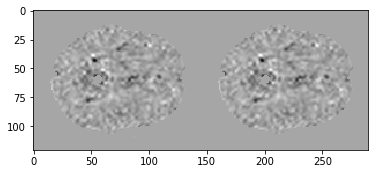

In [3]:
# display images left and right
def plot_raw(img1, img2):
    plt.imshow(np.hstack((img1, img2)))
    plt.show()
    
plot_raw(img1_slice, img1_slice)

#### 3. Let's plot a 1d histogram for each of the two iamges

In [4]:
def plot_hist1d(img1, img2, bins=20):
    """
    one dimensional histogram of the slices

    Parameters
    ----------
    img1: nii image data read via nibabel

    img2: nii image data read via nibabel

    bins: optional (default=20)
        bin size of the histogram

    Returns
    -------
    histogram
        comparing two images side by side
    """
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(img1.ravel(), bins)
    axes[0].set_title('Img1 histogram')
    axes[1].hist(img2.ravel(), bins)
    axes[1].set_title('Img2 histogram')
    plt.show()

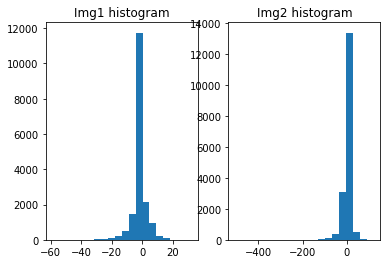

In [5]:
plot_hist1d(img1_slice, img2_slice)

#### 4. Let's plot the two images against each other on a scatter plot, and calculate correlation coefficient

In [6]:
def plot_scatter2d(img1, img2):
    """
    plot the two image's histogram against each other

    Parameters
    ----------
    img1: nii image data read via nibabel

    img2: nii image data read via nibabel

    Returns
    -------
    2d plotting of the two images and correlation coeeficient
    """
    corr = np.corrcoef(img1.ravel(), img2.ravel())[0, 1]
    plt.plot(img1.ravel(), img2.ravel(), '.')
    
    plt.xlabel('Img1 signal')
    plt.ylabel('Img2 signal')
    plt.title('Img1 vs Img2 signal cc=' + str(corr))
    plt.show()

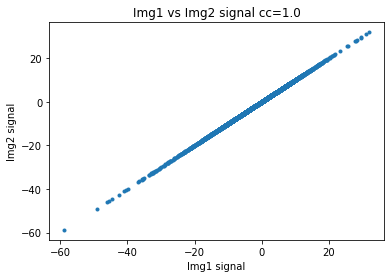

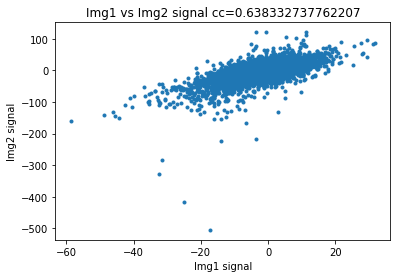

In [7]:
# this one is comparing two identical images so it should equal 1
plot_scatter2d(img1_slice, img1_slice)

# image 1 vs image 2
plot_scatter2d(img1_slice, img2_slice)

### Feature Space

Using MI as a registration measure, we plot a **_feature space_** (or **_joint histogram_**), a two-dimensional plot showing the combinations of grey values in each of the two images for all corresponding points. For example, for each corresponding point (x, y), in which x and y are coordinates of first and second images respectively, 

As the alignment of the two images change, the feature space changes. The more correctly registered the two images are, the more anatomical structures will overlap, showing clusters for the grey values. When the images are misaligned, the intensity of the clusters for certain structures will decrease, and a new pair of (x, y) will be matched as the image gets incorrectly aligned with other nearby structures of the other image. This is be shown as the dispersion of the clustering.

#### 5. Let's plot a joint histogram now

In [8]:
def plot_joint_histogram(img1, img2, bins=20, log=True):
    """
    plot feature space. Given two images, the feature space is constructed by counting the number of times a combination of grey values occur

    Parameters
    ----------
    img1: nii image data read via nibabel

    img2: nii image data read via nibabel

    bins: optional (default=20)
        bin size of the histogram
    log: boolean (default=True)
        keeping it true will show a better contrasted image

    Returns
    -------
    joint histogram
        feature space of the two images in graph

    """
    hist_2d, x_edges, y_edges = np.histogram2d(img1.ravel(), img2.ravel(), bins)
    # transpose to put the T1 bins on the horizontal axis and use 'lower' to put 0, 0 at the bottom of the plot
    if not log:
        plt.imshow(hist_2d.T, origin='lower')
        plt.xlabel('Img1 signal bin')
        plt.ylabel('Img2 signal bin')

    # log the values to reduce the bins with large values
    hist_2d_log = np.zeros(hist_2d.shape)
    non_zeros = hist_2d != 0
    hist_2d_log[non_zeros] = np.log(hist_2d[non_zeros])
    plt.imshow(hist_2d_log.T, origin='lower')
    plt.xlabel('Img1 signal bin')
    plt.ylabel('Img2 signal bin')

None


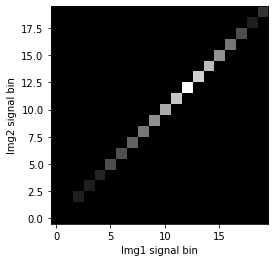

In [9]:
# this should print a linear graph as it's comparing it to itself
print(plot_joint_histogram(img1_slice, img1_slice))

None


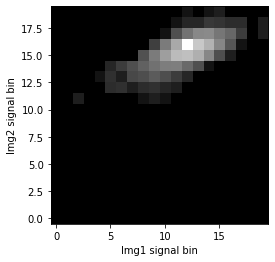

In [10]:
# compare images 1 and 2
print(plot_joint_histogram(img1_slice, img2_slice))

#### 6. Let's calculate the mutual information of the two images now. 
We use the third formula stated above to measure the overlaps of the two images. The goal of registration is to maximize mutual information or the overlaps. 

In [11]:
def mutual_information(img1, img2, bins=20):
    """
    measure the mutual information of the given two images

    Parameters
    ----------
    img1: nii image data read via nibabel

    img2: nii image data read via nibabel

    bins: optional (default=20)
        bin size of the histogram

    Returns
    -------
    calculated mutual information: float

    """
    hist_2d, x_edges, y_edges = np.histogram2d(img1.ravel(), img2.ravel(), bins)
    
    # convert bins counts to probability values
    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)  # marginal x over y
    py = np.sum(pxy, axis=0)  # marginal y over x
    px_py = px[:, None] * py[None, :]  # broadcast to multiply marginals

    # now we can do the calculation using the pxy, px_py 2D arrays
    nonzeros = pxy > 0  # filer out the zero values
    return np.sum(pxy[nonzeros] * np.log(pxy[nonzeros] / px_py[nonzeros]))

In [12]:
# the MI value of the first should be greater than the second as the first is comparing the image to itself
print(mutual_information(img1_slice, img1_slice))
print(mutual_information(img1_slice, img2_slice))

1.1967155090861803
0.20578049748917815


## Calculating the Grand Average of Mutual Information 

The codes above are detailed step-by-step processes. We can condense the codes above into one useful function that will allow us to examine the overall average of mutual information of each every scan image to the register image. 

For example, given a register type ('rtf' for register to first image, or 'rtm' for register to mean), it will calculate each scan to the register image, calculate the MI, and return the grand average MI value. 

**Note**: The code is currently based on ACCRE system so the paths directing to the images must be changed for flexible use. The path should direct to the folder which holds all the scan images, and since it requires gigabytes of data, I had to implement the code on ACCRE-use only. 

In [1]:
def get_avg_mi(subjID, type='rtf', saveText=False, verbose=False, nScans=187):
    """
    calculates the correlation coefficient and mutual information of the registered image to the rest of image files, and returns the grand average and trial averages

    Parameters
    ----------
    subjID : str
        string of subject data (ie. 'cdcatmr011')
    type : str {'rtf', 'rtm'}
        registration type that would either register to first scan image or the mean image (default: 'rtf')
    saveText : boolean
        if True, will save the table report to a separate text file (default: False)
    verbose : boolean
        if True, will print out which scan file is being worked on (default: False)
    nScans : int
        integer of how many scans to expect per each run (default: 187)

    Returns
    -------
    cc_all: list
        list of all correlation coefficient values
    mi_all: list
        list of all mutual information values

    """
    saveText = False
    subj = str(subjID)
    baseDir = '/scratch/polynlab/fmri/cdcatmr/'
    funcDir = baseDir + subj + '/images/func'
    tag = 'func'
    if type == 'rtf':  # register to first
        sourceImg = '/func1/func1_00001.nii'  # [rmeanfunc1_00001.nii, meanfunc1_00001.nii]
        # tag = 'func'
    elif type == 'rtm':  # register to mean
        sourceImg = '/func1/meanfunc1_00001.nii'
        # tag = 'rfunc'
    resDir = '/home/jeonj1/proj/mi'

    os.chdir(funcDir)
    funcs = os.listdir(funcDir)
    funcs.sort()  # funcs = ['func1', 'func2', ... 'func7', 'func8']

    meanImg = mi.get_img_slice(funcDir + sourceImg, verbose=verbose)
    mi_listVar = []
    cc_listVar = []
    # loop by each functional run
    for i in range(0, len(funcs)):
        curr_func = funcs[i]
        # let's first create list variables for each functional run
        temp = ''
        temp = 'mi_' + curr_func + ' = []'
        exec(temp)
        mi_listVar.append('mi_' + curr_func)
        temp = ''
        temp = 'cc_' + curr_func + ' = []'
        exec(temp)
        cc_listVar.append('cc_' + curr_func)

        # now let's read in each functional run folder
        cfuncDir = funcDir + '/' + curr_func
        os.chdir(cfuncDir)
        nii_files = os.listdir(cfuncDir)
        nii_files = [x for x in nii_files if x.startswith(tag) and x.endswith('nii')]
        nii_files.sort()

        # sanity check: count scan files
        assert len(nii_files) == nScans, "total scan files found do not match " + str(nScans) + " for func run " + str(i+1)

        # loop by each scan within run
        for j in range(0, nScans):
            if verbose:
                print('starting ' + curr_func + ' | scan ' + str(j+1))
            curr_nii = mi.get_img_slice(nii_files[j], verbose=verbose)
            corr = mi.get_core(meanImg, curr_nii)
            mutual_info = mi.mutual_information(meanImg, curr_nii)

            # append each list
            temp_cc = 'cc_' + curr_func + '.append(corr)'
            exec(temp_cc)
            temp_mi = 'mi_' + curr_func + '.append(mutual_info)'
            exec(temp_mi)

    cc_sums = []
    mi_sums = []
    for r in range(0, len(funcs)):
        cc_sums.append(sum(eval(cc_listVar[r])))
        mi_sums.append(sum(eval(mi_listVar[r])))

    # get all entries in a single list
    cc_all = []
    mi_all = []
    for r in range(0, len(funcs)):
        cc_all = cc_all + eval(cc_listVar[r])
        mi_all = mi_all + eval(mi_listVar[r])


    reports = []
    reports.append(['avg cc', sum(cc_sums)/(nScans*len(funcs))])
    reports.append(['avg mi', sum(mi_sums)/(nScans*len(funcs))])
    reports.append(['cc by runs', '-----'])
    for l in cc_listVar:
        reports.append([l, sum(eval(l))/nScans])
    reports.append(['mi by runs', '-----'])
    for l in mi_listVar:
        reports.append([l, sum(eval(l))/nScans])

    print(tabulate(reports))

    if saveText:
        with open(resDir + '/' + subj + '_mi_' + os.path.basename(sourceImg) + '.txt', 'w') as f:
            for item in reports:
                f.write("%s\n" % item)
        print('saved the table report to ' + resDir)

    return cc_all, mi_all


## T-test and Plotting
We can use the function `get_avg_mi` above to calculate the grand average. Then we will run a t-test on the two averages and plot the differences for visual reference. The script below is currently somewhat hard coded for simplicity sake. 

In [ ]:
nScans = 187
nRuns = 8

# we use the get_avg_mi function stated above. Specify the subject and register type. 
cc1, mi1 = get_avg_mi('cdcatmr066', 'rtf', verbose=True)  # register to first scan
cc2, mi2 = get_avg_mi('cdcatmr066', 'rtm', verbose=True)  # register to mean

assert len(cc1) == len(cc2) == nScans * nRuns
assert len(mi1) == len(mi2) == nScans * nRuns

cc_t, cc_p = stats.ttest_ind(cc1, cc2)
mi_t, mi_p = stats.ttest_ind(mi1, mi2)


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# switch matplotlib backend so that it knows it won't print anything.
plt.switch_backend('agg')

# sns.set(color_codes=True)
sns.set_color_codes('pastel')
# sns.set_palette("tab10")

plt.figure(0)
sns.distplot(cc1, label='rtf');
sns.distplot(cc2, label='rtm');
plt.legend()
plt.title('correlation coefficient n=' + str(len(cc1)))
plt.savefig('/home/jeonj1/proj/mi/cc_distplot.png')

plt.figure(1)
sns.distplot(mi1, label='rtf');
sns.distplot(mi2, label='rtm');
plt.legend()
plt.title('mutual info | n=' + str(len(mi1)))
plt.savefig('/home/jeonj1/proj/mi/mi_distplot.png')


# let's plot box-dist plot combined
f, (ax_box1, ax_box2, ax_dist) = plt.subplots(3, sharex=True, gridspec_kw= {"height_ratios": (0.3, 0.3, 1)})

cc1_mean = np.mean(cc1)
cc2_mean = np.mean(cc2)

sns.boxplot(cc1, ax=ax_box1, color='b')
sns.boxplot(cc2, ax=ax_box2, color='r')
ax_box1.axvline(cc1_mean, color='g', linestyle='--')
ax_box2.axvline(cc2_mean, color='m', linestyle='--')
plt.subplots_adjust(top=0.87)
plt.suptitle('correlation coefficient n=' + str(len(cc1)), fontsize = 16)

sns.distplot(cc1, ax=ax_dist, label='rtf', color='b', norm_hist=True)
sns.distplot(cc2, ax=ax_dist, label='rtm', color='r', norm_hist=True)
ax_dist.axvline(cc1_mean, color='g', linestyle='--')
ax_dist.axvline(cc2_mean, color='m', linestyle='--')
plt.legend()
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')
plt.savefig('/home/jeonj1/proj/mi/cc_box_distplot.png')


# let's plot box-dist plot combined
f, (ax_box1, ax_box2, ax_dist) = plt.subplots(3, sharex=True, gridspec_kw= {"height_ratios": (0.3, 0.3, 1)})

mi1_mean = np.mean(mi1)
mi2_mean = np.mean(mi2)

sns.boxplot(mi1, ax=ax_box1, color='b')
sns.boxplot(mi2, ax=ax_box2, color='r')
ax_box1.axvline(mi1_mean, color='g', linestyle='--')
ax_box2.axvline(mi2_mean, color='m', linestyle='--')
plt.subplots_adjust(top=0.87)
plt.suptitle('mutual information n=' + str(len(cc1)), fontsize = 16)

sns.distplot(mi1, ax=ax_dist, label='rtf', color='b', norm_hist=True)
sns.distplot(mi2, ax=ax_dist, label='rtm', color='r', norm_hist=True)
ax_dist.axvline(mi1_mean, color='g', linestyle='--')
ax_dist.axvline(mi2_mean, color='m', linestyle='--')
plt.legend()
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')
plt.savefig('/home/jeonj1/proj/mi/mi_box_distplot.png')


The following code above will generate two joint plots that combine the box plot and distribution plot for correlation coefficient and mutual information. The first image below shows the correlation coefficient distribution (note that the max is at 1.00). The N here represents the total number of scan images that were compared.

![CC distribution plot for rtf vs rtm](cc_box_distplot.png "CC distribution plot for rtf vs rtm")

The image below is what we're really interested in (!The title should be changed to MI!). You can see the values range from 0.6~1.4. Also, it shows evidence that RTF version has outliers depicted in the box plot, but the outlier is moderated with the RTM method. 

![MI distribution plot for rtf vs rtm](mi_box_distplot.png "MI distribution plot for rtf vs rtm")

### References & Useful Links

https://people.csail.mit.edu/fisher/publications/papers/tsai99.pdf

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.87.2130&rep=rep1&type=pdf

https://matthew-brett.github.io/teaching/mutual_information.html#t1-t2-scatter